#####     
# MNIST Classifier

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

from sklearn.model_selection import train_test_split

In [2]:
MNIST = pd.read_csv('MNIST.csv',header=0)
MNIST.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
MNIST.shape

(42000, 785)

In [4]:
MNIST.label.nunique()

10

In [5]:
sorted(MNIST.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
MNIST.isnull().sum().sum()

0

In [7]:
X = MNIST.drop('label',axis=1) / 255.0
X = X.values.reshape( X.shape[0], 28, 28 )

y = MNIST.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   
    tf.keras.layers.Dense(128,activation='relu'),   
    tf.keras.layers.Dropout(0.2),                   
    tf.keras.layers.Dense(10)                       
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
predictions = model(X_train).numpy()
predictions

array([[ 0.04709689,  0.08461522, -0.1854454 , ...,  0.15209642,
        -0.10459156, -0.23076686],
       [ 0.2085304 , -0.53677464, -0.32865143, ...,  0.22774592,
         0.01195496, -0.3604321 ],
       [-0.32064134,  0.00094497, -0.13518932, ..., -0.04754616,
         0.55595016,  0.36788008],
       ...,
       [-0.30161056,  0.8329696 , -0.4415721 , ...,  0.03178717,
         0.2453377 , -0.3049361 ],
       [-0.1285617 ,  0.24214518, -0.26320451, ...,  0.21205711,
        -0.5499366 , -0.01813355],
       [ 0.06424585, -0.12559283, -0.5179649 , ...,  0.63195986,
         0.17951967, -0.19350958]], dtype=float32)

In [10]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(33600, 10), dtype=float32, numpy=
array([[0.09708457, 0.10079622, 0.0769411 , ..., 0.10783282, 0.08342049,
        0.07353186],
       [0.11572494, 0.05492184, 0.06762882, ..., 0.11797014, 0.09507258,
        0.06551333],
       [0.06444485, 0.0888897 , 0.0775763 , ..., 0.08468217, 0.15484141,
        0.12829489],
       ...,
       [0.06172827, 0.19196673, 0.05366604, ..., 0.08615427, 0.10666469,
        0.06152333],
       [0.09105542, 0.1319173 , 0.07958499, ..., 0.12800728, 0.05974547,
        0.10168669],
       [0.09667107, 0.07995592, 0.05400645, ..., 0.17054994, 0.10848241,
        0.07470588]], dtype=float32)>

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
loss_fn(y_train,predictions).numpy()

2.3787043

In [13]:
model.compile( 
    optimizer =   'adam',
    loss      =   loss_fn, 
    metrics   = ['accuracy']
             )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3682 - accuracy: 0.8952
Epoch 2/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1750 - accuracy: 0.9481
Epoch 3/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1295 - accuracy: 0.9614
Epoch 4/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1014 - accuracy: 0.9699
Epoch 5/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0873 - accuracy: 0.9737


In [15]:
model.evaluate(X_test,y_test,verbose=2)

263/263 - 1s - loss: 0.0956 - accuracy: 0.9714 - 695ms/epoch - 3ms/step


[0.09563187509775162, 0.9714285731315613]

#####     

#####     

#####     

#####     
# Binary Classifier

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as npimg

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

from sklearn.model_selection import train_test_split

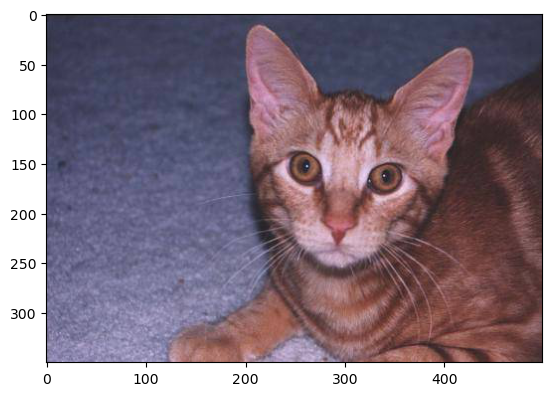

In [17]:
img = npimg.imread('catdog/Train_Set/cats/cat.107.jpg')
imgplot = plt.imshow(img)
plt.show()

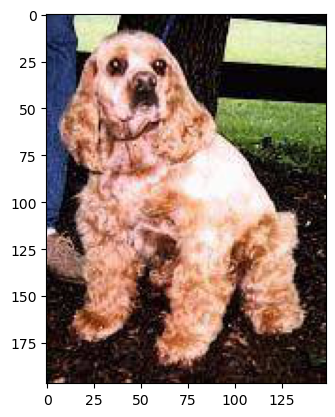

In [18]:
img = npimg.imread('catdog/Train_Set/dogs/dog.40.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
tf.__version__

'2.12.0'

In [20]:
img_width, img_height = 150, 150
train_data_dir  = 'catdog/Train_Set'
valid_data_dir  = 'catdog/Test_Set'
nb_train_sample = 20
nb_valid_sample = 20
epochs = 10
batch_size = 50

In [21]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [22]:
train_datagen = ImageDataGenerator(
    rescale         = 1./255., 
    shear_range     = 0.2, 
    zoom_range      = 0.2, 
    horizontal_flip = True 
    )

test_datagen = ImageDataGenerator( 
    rescale  = 1./255. 
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir, 
    target_size = ( img_width, img_height ), 
    batch_size  =   batch_size, 
    class_mode  =  'binary', 
    classes     = ['cats','dogs']
    )

valid_generator = test_datagen.flow_from_directory( 
    valid_data_dir, 
    target_size = ( img_width, img_height ),
    batch_size  =   batch_size, 
    class_mode  =  'binary',
    classes     = ['cats','dogs']
    )

Found 6004 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


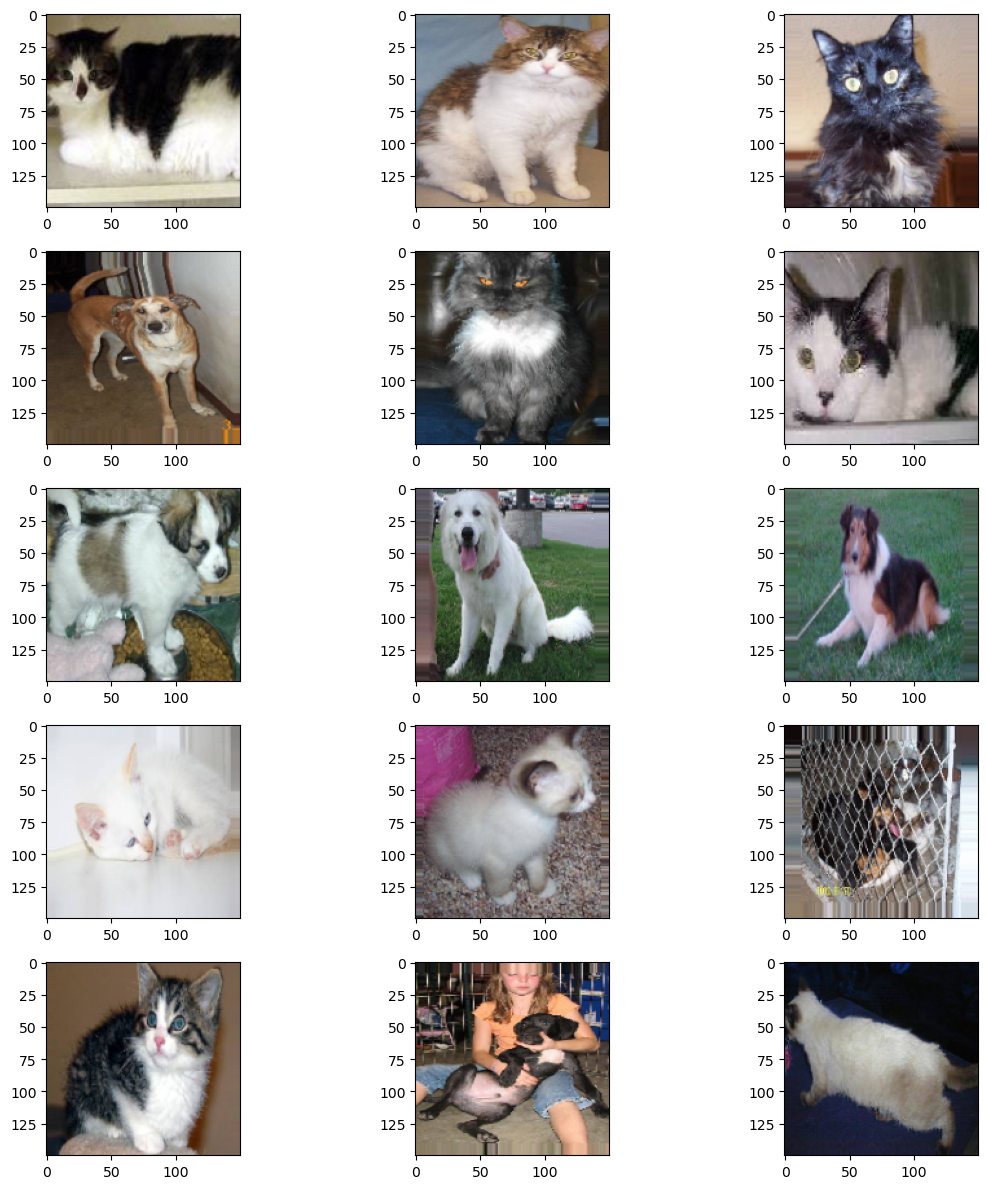

In [23]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_batch, y_batch in train_generator:
        image = x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [53]:
# Initiating a Seguential model
model = Sequential()

# Convolution Layr: Converts Images to an Array
model.add( Conv2D( 64, (3,3), input_shape=input_shape ) )    # 64 neurons  using 3x3 filter
# Pooling Layer: Reducing size of data
model.add( MaxPooling2D( pool_size=(2,2) )              )    
# Flatten Layer: Converting Multi-Dimensional Array to 1D Array
model.add( Flatten()                                    )    

# 1st Dense Layers ( Dropout reduces overfit )
model.add( Dense( 64 )                                  )
model.add( Dropout(0.2)                                 )   
model.add( Activation( 'relu' )                         )    # Regularization to Convert -ve numbers to 0


# Mid Dense Layers
model.add( Dense( 16 )                                  )
model.add( Activation( 'relu' )                         )
model.add( Dense( 16 )                                  )
model.add( Activation( 'relu' )                         )
model.add( Dense( 16 )                                  )
model.add( Activation( 'relu' )                         )
model.add( Activation( 'relu' )                         )
model.add( Dense( 16 )                                  )
model.add( Activation( 'relu' )                         )
model.add( Dense( 16 )                                  )
model.add( Activation( 'relu' )                         )

# Output Layer
model.add( Dense( 1 )                                   )     
model.add( Activation( 'sigmoid' )                      )

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_25 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 350464)            0         
                                                                 
 dense_22 (Dense)            (None, 64)                22429760  
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                      

In [54]:
model.compile( 
    optimizer = 'rmsprop',
    loss      = 'binary_crossentropy', 
    metrics   = ['accuracy']
             )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_25 (Activation)  (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 350464)            0         
                                                                 
 dense_22 (Dense)            (None, 64)                22429760  
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                      

In [55]:
training = model.fit(
    train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, 
    validation_data=valid_generator, validation_steps=nb_valid_sample
                    )

Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 0.7394 - accuracy: 0.4840 - val_loss: 0.6923 - val_accuracy: 0.5410
Epoch 2/10
20/20 [==============================] - 42s 2s/step - loss: 0.6946 - accuracy: 0.5120 - val_loss: 0.6987 - val_accuracy: 0.4820
Epoch 3/10
20/20 [==============================] - 43s 2s/step - loss: 0.6950 - accuracy: 0.4850 - val_loss: 0.6913 - val_accuracy: 0.5580
Epoch 4/10
20/20 [==============================] - 42s 2s/step - loss: 0.6905 - accuracy: 0.5470 - val_loss: 0.6897 - val_accuracy: 0.4940
Epoch 5/10
20/20 [==============================] - 43s 2s/step - loss: 0.6907 - accuracy: 0.5330 - val_loss: 0.6885 - val_accuracy: 0.4960
Epoch 6/10
20/20 [==============================] - 43s 2s/step - loss: 0.6881 - accuracy: 0.5480 - val_loss: 0.6825 - val_accuracy: 0.6190
Epoch 7/10
20/20 [==============================] - 45s 2s/step - loss: 0.6837 - accuracy: 0.5510 - val_loss: 0.6745 - val_accuracy: 0.6020
Epoch 8/10
20/20 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


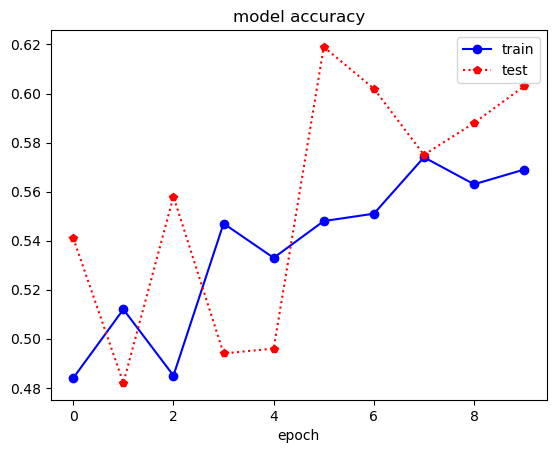

In [56]:
print(training.history.keys())
plt.plot(training.history['accuracy'],'b-o')
plt.plot(training.history['val_accuracy'],'r:p')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


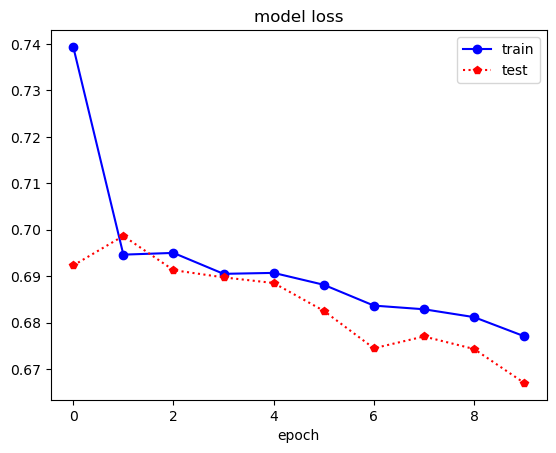

In [57]:
print(training.history.keys())
plt.plot(training.history['loss'],'b-o')
plt.plot(training.history['val_loss'],'r:p')
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

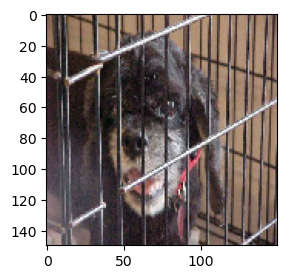

1/1 [==============================] - 0s 181ms/step
prediction = Dog


In [58]:
from tensorflow.keras.preprocessing import image

img = image.load_img('catdog/Test_Set/dogs/dog.3577.jpg',target_size=(150,150))
plt.figure(figsize=(3,3)); plt.imshow(img); plt.show()

img_pred = image.img_to_array(img)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
if rslt[0][0] == 1:
    prediction='Dog'
else:
    prediction='Cat'
print('prediction =',prediction)

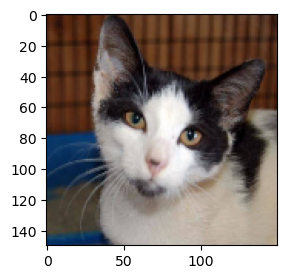

1/1 [==============================] - 0s 45ms/step
prediction = Cat


In [59]:
img = image.load_img('catdog/Test_Set/cats/cat.3533.jpg',target_size=(150,150))
plt.figure(figsize=(3,3)); plt.imshow(img); plt.show()

img_pred = image.img_to_array(img)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
if rslt[0][0] == 1:
    prediction='Dog'
else:
    prediction='Cat'
print('prediction =',prediction)

#####   

#####   

#####   

#####   

## LSTM Types: 

**Basic LSTM:** 
 - a simple LSTM network 
 - with a single layer of LSTM neurons, 
 - used for tasks like **sequence prediction** and **generating text.**
<Br>
<Br>
    
**Bidirectional LSTM:** 
 - a LSTM network that processes the input sequence in both forward and backward directions, 
 - used for tasks like **sentiment analysis** and **text classification.**
<Br>
<Br>
    
**Stacked LSTM:** 
 - a LSTM network with multiple layers of LSTM neurons, 
 - used for tasks where **sequential information** must be captured and used across **multiple timesteps.**
<Br>
<Br>
    

**Gated Recurrent Unit (GRU):** 
 - a simpler recurrent neuron model than the LSTM, 
 - used for tasks like **sequence prediction** and **generating text.**
<Br>
<Br>
    

**Long Short-Term Muscle (LSTM):**
 - a more complex version of the LSTM, 
 - designed to solve the problem of **"gradient vanishing"** in LSTM networks.